## Data Loading and Cleaning

In [2]:
# Data manipulation and analysis
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import hvplot.pandas
import numpy as np

# Statistical analysis
from scipy.stats import pearsonr

# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine learning (for forecasting)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load EV sales data


In [3]:
# Load EV sales data
ev_sales_data = pd.read_csv('Resources/IEA-EV-dataEV_salesHistoricalCars.csv')

# Display the first few rows of the EV sales data to check the structure
("EV Sales Data:")
(ev_sales_data.head())

# Load CO2 emissions data
co2_emissions_data = pd.read_csv('Resources/annual-co2-emissions-per-country.csv')

# Display the first few rows of the CO2 emissions data to check the structure
("\nCO2 Emissions Data:")
(co2_emissions_data.head())


,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [4]:
co2_emissions_data.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [5]:
CO2_data = co2_emissions_data.rename(columns={"Entity":"Region"})
CO2_data

,Region,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
31344,Zimbabwe,ZWE,2017,9596071.0
31345,Zimbabwe,ZWE,2018,11795478.0
31346,Zimbabwe,ZWE,2019,11114607.0
31347,Zimbabwe,ZWE,2020,10607897.0


In [6]:
pd.set_option("display.max_rows", None)
ev_sales_data

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,4.600000e-04
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,1.700000e+02
5,Australia,Historical,EV sales share,Cars,EV,2012,percent,3.000000e-02
6,Australia,Historical,EV stock share,Cars,EV,2012,percent,2.800000e-03
7,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,8.000000e+01
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,8.000000e+01


In [7]:
sale_pd = ev_sales_data.replace("USA", "United States")
sale_pd.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [8]:
sale_pd.rename(columns={
    "region": "Region",
    "parameter": "Parameter",
    "mode": "Mode",
    "powertrain": "Powertrain",
    "year": "Year",
    "unit": "Unit",
    "value": "Value"
}, inplace=True)
sale_pd.head()


,Region,category,Parameter,Mode,Powertrain,Year,Unit,Value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [9]:
combined_df = pd.merge(sale_pd,CO2_data, on=['Region', 'Year'] )
combined_df

,Region,category,Parameter,Mode,Powertrain,Year,Unit,Value,Code,Annual CO₂ emissions
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01,AUS,4.038288e+08
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,4.600000e-04,AUS,4.038288e+08
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03,AUS,4.038288e+08
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01,AUS,4.038288e+08
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,1.700000e+02,AUS,4.061509e+08
5,Australia,Historical,EV sales share,Cars,EV,2012,percent,3.000000e-02,AUS,4.061509e+08
6,Australia,Historical,EV stock share,Cars,EV,2012,percent,2.800000e-03,AUS,4.061509e+08
7,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02,AUS,4.061509e+08
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,8.000000e+01,AUS,4.061509e+08
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,8.000000e+01,AUS,4.061509e+08


In [10]:
data_df= combined_df.loc[combined_df["Parameter"]== "EV sales", :]
data_df

,Region,category,Parameter,Mode,Powertrain,Year,Unit,Value,Code,Annual CO₂ emissions
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0,AUS,4.038288e+08
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0,AUS,4.061509e+08
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.0,AUS,4.061509e+08
10,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100.0,AUS,3.978875e+08
15,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190.0,AUS,3.978875e+08
16,Australia,Historical,EV sales,Cars,BEV,2014,Vehicles,370.0,AUS,3.939529e+08
21,Australia,Historical,EV sales,Cars,PHEV,2014,Vehicles,950.0,AUS,3.939529e+08
22,Australia,Historical,EV sales,Cars,PHEV,2015,Vehicles,1000.0,AUS,4.017931e+08
27,Australia,Historical,EV sales,Cars,BEV,2015,Vehicles,760.0,AUS,4.017931e+08
28,Australia,Historical,EV sales,Cars,BEV,2016,Vehicles,670.0,AUS,4.112643e+08


In [11]:
data_date = data_df[["Region", "Parameter", "Mode", "Year", "Value", "Annual CO₂ emissions"]]
data_date.head()

,Region,Parameter,Mode,Year,Value,Annual CO₂ emissions
3,Australia,EV sales,Cars,2011,49.0,403828770.0
4,Australia,EV sales,Cars,2012,170.0,406150900.0
9,Australia,EV sales,Cars,2012,80.0,406150900.0
10,Australia,EV sales,Cars,2013,100.0,397887460.0
15,Australia,EV sales,Cars,2013,190.0,397887460.0


In [12]:
pd_date = data_date.loc[(data_date["Region"]== "United States")]
pd_date

,Region,Parameter,Mode,Year,Value,Annual CO₂ emissions
1980,United States,EV sales,Cars,2010,1200.0,5.681392e+09
1981,United States,EV sales,Cars,2011,9800.0,5.546629e+09
1988,United States,EV sales,Cars,2011,8000.0,5.546629e+09
1991,United States,EV sales,Cars,2012,39000.0,5.345454e+09
1998,United States,EV sales,Cars,2012,15000.0,5.345454e+09
1999,United States,EV sales,Cars,2013,48000.0,5.480926e+09
2006,United States,EV sales,Cars,2013,49000.0,5.480926e+09
2009,United States,EV sales,Cars,2014,55000.0,5.528871e+09
2016,United States,EV sales,Cars,2014,63000.0,5.528871e+09
2020,United States,EV sales,Cars,2015,71000.0,5.376578e+09


In [13]:
EV_df= pd_date.groupby("Year").sum()
EV_df

,Region,Parameter,Mode,Value,Annual CO₂ emissions
Year,,,,,
2010,United States,EV sales,Cars,1200.0,5.681392e+09
2011,United StatesUnited States,EV salesEV sales,CarsCars,17800.0,1.109326e+10
2012,United StatesUnited States,EV salesEV sales,CarsCars,54000.0,1.069091e+10
2013,United StatesUnited States,EV salesEV sales,CarsCars,97000.0,1.096185e+10
2014,United StatesUnited States,EV salesEV sales,CarsCars,118000.0,1.105774e+10
2015,United StatesUnited States,EV salesEV sales,CarsCars,114000.0,1.075316e+10
2016,United StatesUnited States,EV salesEV sales,CarsCars,160000.0,1.050352e+10
2017,United StatesUnited States,EV salesEV sales,CarsCars,194000.0,1.042191e+10
2018,United StatesUnited States,EV salesEV sales,CarsCars,360000.0,1.075331e+10


In [14]:
EV_df.to_csv('cleaned_df.csv', index=False)

## Vizualization

In [13]:
# Create a scatter plot of years_experience versus the salary information
emissions_plot = EV_df.hvplot.scatter(
    x="Value",
    y="Annual CO₂ emissions",
    title="EV Sales and CO2 Emissions correlation"
)
emissions_plot

:Scatter   [Value]   (Annual CO₂ emissions)

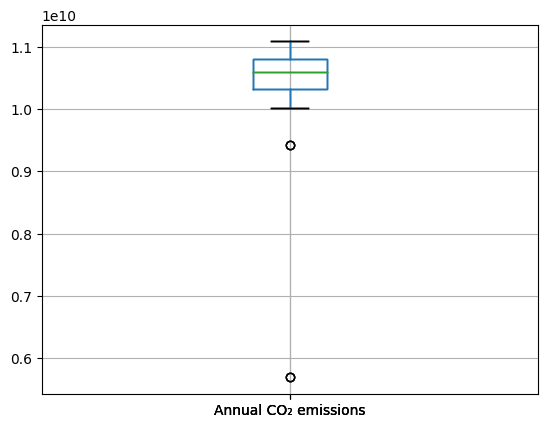

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
EV_df.boxplot(
    column="Annual CO₂ emissions"
    )
plt.show()

In [39]:
Q1 = EV_df['Annual CO₂ emissions'].quantile(0.25)
Q3 = EV_df['Annual CO₂ emissions'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (EV_df['Annual CO₂ emissions'] >= Q1 - 1.5 * IQR) & (EV_df['Annual CO₂ emissions'] <= Q3 + 1.5 *IQR)
EV_newdf = EV_df.loc[filter]

In [57]:
# Create a scatter plot of years_experience versus the salary information
sales_plot = EV_newdf.hvplot.scatter(
    x="Year",
    y="Value",
    title="EV Sales and CO2 Emissions correlation"
)
sales_plot

:Scatter   [Year]   (Value)

In [64]:
EV_newdf.reset_index(inplace = True)

In [65]:
X2 = EV_newdf["Year"].values.reshape(-1, 1)

# Display sample data
X2[:5]

array([[2011],
       [2012],
       [2013],
       [2014],
       [2015]])

In [74]:
# The shape of X is 30 samples, with a single feature (column)
X2.shape

(10, 1)

In [75]:
# Create an array for the dependent variable y
y = EV_newdf["Value"]

In [76]:
# Create a model with scikit-learn
model = LinearRegression()

In [77]:
# Fit the data into the model
model.fit(X2, y)

LinearRegression()

In [78]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [53256.70995671]


In [79]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -107137244.58874461


In [80]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = -107137244.58874461 + 53256.70995670997X


In [82]:
# Display the formula to predict CO₂ emissions in 5 years
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 2026")

# Predict CO₂ emissions in 5 years
y_5 = model.intercept_ + model.coef_[0] * 2026

# Display the prediction
print(f"Predicted CO₂ emissions in 5 years: {y_5:.2f}")

Model's formula: y = -107137244.58874461 + 53256.70995670997 * 2026
Predicted CO₂ emissions in 5 years: 760849.78


In [61]:
EV_newdf.head()

,Region,Parameter,Mode,Value,Annual CO₂ emissions
Year,,,,,
2011,United StatesUnited States,EV salesEV sales,CarsCars,17800.0,1.109326e+10
2012,United StatesUnited States,EV salesEV sales,CarsCars,54000.0,1.069091e+10
2013,United StatesUnited States,EV salesEV sales,CarsCars,97000.0,1.096185e+10
2014,United StatesUnited States,EV salesEV sales,CarsCars,118000.0,1.105774e+10
2015,United StatesUnited States,EV salesEV sales,CarsCars,114000.0,1.075316e+10


## Data Preparation

In [40]:
# Reformat data of the independent variable X as a single-column array
X = EV_newdf["Value"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[ 17800.],
       [ 54000.],
       [ 97000.],
       [118000.],
       [114000.]])

In [41]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(10, 1)

In [42]:
# Create an array for the dependent variable y
y = EV_newdf["Annual CO₂ emissions"]

## Building the Linear Regression Model

In [43]:
# Create a model with scikit-learn
model = LinearRegression()

In [44]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [45]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [-1399.3835244]


In [46]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 10966506461.879375


In [47]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 10966506461.879375 + -1399.3835243954732X


In [83]:
# Display the formula to predict CO₂ emissions in 5 years
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 760849.78")

# Predict CO₂ emissions in 5 years
y_7 = model.intercept_ + model.coef_[0] * 760849.78

# Display the prediction
print(f"Predicted CO₂ emissions in 5 years: {y_7:.2f}")

Model's formula: y = -107137244.58874461 + 53256.70995670997 * 760849.78
Predicted CO₂ emissions in 5 years: 40413218809.50


In [84]:
# Make predictions using the X set
predicted_y_values = model.predict(X)
predicted_y_values

array([8.40832193e+08, 2.76872509e+09, 5.05876362e+09, 6.17715453e+09,
       5.96412769e+09, 8.41393635e+09, 1.02246645e+10, 1.90652783e+10,
       1.72012935e+10, 3.34445900e+10])

In [85]:
# Create a copy of the original data
df_emissions_predicted = EV_newdf.copy()

# Add a column with the predicted salary values
df_emissions_predicted["Emissions predicted"] = predicted_y_values

# Display sample data
df_emissions_predicted

,Year,Region,Parameter,Mode,Value,Annual CO₂ emissions,Emissions predicted
0,2011,United StatesUnited States,EV salesEV sales,CarsCars,17800.0,1.109326e+10,8.408322e+08
1,2012,United StatesUnited States,EV salesEV sales,CarsCars,54000.0,1.069091e+10,2.768725e+09
2,2013,United StatesUnited States,EV salesEV sales,CarsCars,97000.0,1.096185e+10,5.058764e+09
3,2014,United StatesUnited States,EV salesEV sales,CarsCars,118000.0,1.105774e+10,6.177155e+09
4,2015,United StatesUnited States,EV salesEV sales,CarsCars,114000.0,1.075316e+10,5.964128e+09
5,2016,United StatesUnited States,EV salesEV sales,CarsCars,160000.0,1.050352e+10,8.413936e+09
6,2017,United StatesUnited States,EV salesEV sales,CarsCars,194000.0,1.042191e+10,1.022466e+10
7,2018,United StatesUnited States,EV salesEV sales,CarsCars,360000.0,1.075331e+10,1.906528e+10
8,2019,United StatesUnited States,EV salesEV sales,CarsCars,325000.0,1.051829e+10,1.720129e+10
9,2021,United StatesUnited States,EV salesEV sales,CarsCars,630000.0,1.001467e+10,3.344459e+10


In [86]:
# Create a line plot of years_experience versus the predicted salary values
best_fit_line = df_emissions_predicted.hvplot.line(
    x = "Value",
    y = "Emissions predicted",
    color = "red"
)
best_fit_line

:Curve   [Value]   (Emissions predicted)

In [87]:
# Create a scatter plot of years_experience versus the salary information
emissions_plot = EV_newdf.hvplot.scatter(
    x="Value",
    y="Annual CO₂ emissions",
    title="EV Sales and CO2 Emissions correlation"
)
emissions_plot

:Scatter   [Value]   (Annual CO₂ emissions)

In [88]:
# Superpose the original data and the best fit line
emissions_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [Value]   (Annual CO₂ emissions)
   .Curve.I   :Curve   [Value]   (Emissions predicted)

## Linear Regression Model Assessment

In [89]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is -6723514018.807465.
The r2 is -6723514018.807465.
The mean squared error is 2.0608621759362017e+20.
The root mean squared error is 14355703312.39888.
The standard deviation is 175075.8795494114.
